In [1]:
import keras
from keras import layers, Model, Sequential, ops
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score


-1 254
(100, 128, 128, 3) (100, 128, 128, 1) 128


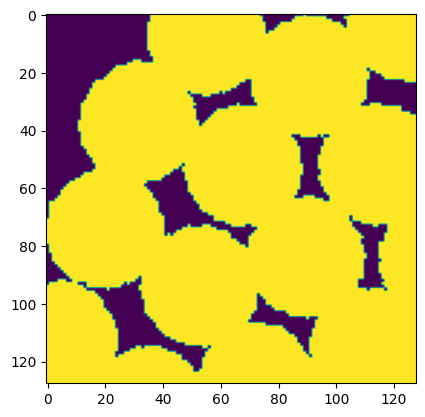

In [83]:
dir = "../lab1/saved"

X = pd.read_csv(dir+"/imgs.csv")
y = pd.read_csv(dir+"/msks.csv")

X.drop(['Unnamed: 0'], axis=1, inplace=True)
y.drop(['Unnamed: 0'], axis=1, inplace=True)

X = np.array( X / 255 )
y = np.array(y)
print(y.min(), y.max())
# y[y == -1] = 1
y[y != 1] = 255
y = (y == 255)
# y[y > 0.01] = 1

size = int(y.shape[-1]**0.5)

X = X.reshape(len(X), size, size, 3)
y = y.reshape(len(y), size, size, 1)


print(X.shape, y.shape, size)
plt.imshow(y[0])

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
drop = 0.2
dense_model = Sequential([
    layers.Input((size,size,3)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(drop),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(drop),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(drop),
    
    layers.Dense(size*size, activation='sigmoid'),
    layers.Reshape((size,size,1))
])

dense_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

In [18]:
dense_model.fit(x_train, y_train, batch_size=20, epochs=50)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.7854 - loss: 0.5142 - precision: 0.9082 - recall: 0.7983
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.7965 - loss: 0.5027 - precision: 0.9072 - recall: 0.8129
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.7876 - loss: 0.5043 - precision: 0.9095 - recall: 0.7989
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8016 - loss: 0.4948 - precision: 0.9182 - recall: 0.8119
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.8147 - loss: 0.4816 - precision: 0.9169 - recall: 0.8332
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.8075 - loss: 0.4840 - precision: 0.9141 - recall: 0.8255
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8125 - loss: 0.4774 - precision: 0.9220 - recall: 0.8268
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.8186 - loss: 0.4645 - precision: 0.9225 - recall: 0.8320
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━

In [19]:
# dense_model.summary()

In [122]:
def show_rand(model,_x, _y):
    x_predict = model.predict(_x)
    i = np.random.randint(len(_x))

    fig = plt.figure(figsize=(12,12))

    ax = fig.add_subplot(1, 3, 2, xticks=[], yticks=[])
    # plt.imshow(y_get_img(y_test, i))
    plt.imshow(_y[i])
    ax.set_title("Mask")


    ax = fig.add_subplot(1, 3, 3, xticks=[], yticks=[])
    # plt.imshow(y_get_img(x_test_predict, i))
    plt.imshow(x_predict[i])
    ax.set_title("Pred")


    ax = fig.add_subplot(1, 3, 1, xticks=[], yticks=[])
    # plt.imshow(x_get_img(x_test, i))
    plt.imshow(_x[i])
    ax.set_title("Img")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


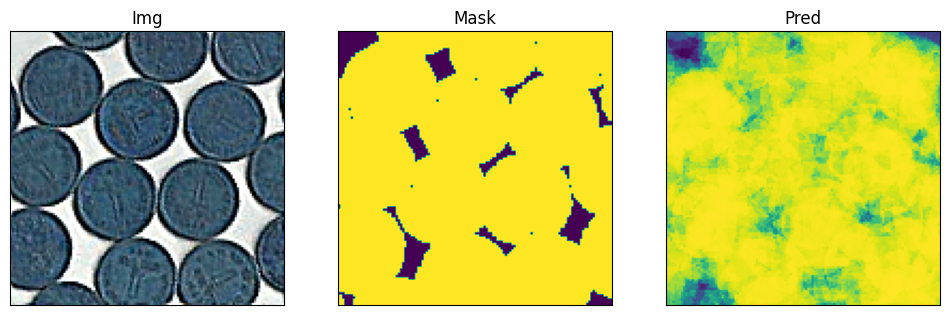

In [196]:
show_rand(dense_model, x_test, y_test)
# show_rand(dense_model, x_train, y_train)

In [143]:
def show_rand_c(model,_x, _y, i=None, predicted=None):
    i = i or np.random.randint(len(_x))

    fig = plt.figure(figsize=(12,12))

    ax = fig.add_subplot(1, 3, 2, xticks=[], yticks=[])
    # plt.imshow(y_get_img(y_test, i))
    plt.imshow(_y[i])
    ax.set_title("Mask")


    ax = fig.add_subplot(1, 3, 3, xticks=[], yticks=[])
    # plt.imshow(y_get_img(x_test_predict, i))
    plt.imshow(predicted[i].argmax(axis=-1))
    ax.set_title("Pred")


    ax = fig.add_subplot(1, 3, 1, xticks=[], yticks=[])
    # plt.imshow(x_get_img(x_test, i))
    plt.imshow(_x[i])
    ax.set_title("Img")

In [ ]:
def double_conv_block(x, n_filters):
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   return x

def downsample_block(x, n_filters):
   f = double_conv_block(x, n_filters)
   p = layers.MaxPool2D(2)(f)
   p = layers.Dropout(0.3)(p)
   return f, p

def upsample_block(x, conv_features, n_filters):
   # upsample
   x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
   # concatenate
   x = layers.concatenate([x, conv_features])
   # dropout
   x = layers.Dropout(0.3)(x)
   # Conv2D twice with ReLU activation
   x = double_conv_block(x, n_filters)

   return x

def unet_model():
    # inputs
   inputs = layers.Input(shape=(size,size,3))

   # encoder: contracting path - downsample
   # 1 - downsample
   f1, p1 = downsample_block(inputs, 64)
   # 2 - downsample
   f2, p2 = downsample_block(p1, 128)
   # 3 - downsample
   f3, p3 = downsample_block(p2, 256)
   # 4 - downsample
   f4, p4 = downsample_block(p3, 512)

   # 5 - bottleneck
   bottleneck = double_conv_block(p4, 1024)

   # decoder: expanding path - upsample
   # 6 - upsample
   u6 = upsample_block(bottleneck, f4, 512)
   # 7 - upsample
   u7 = upsample_block(u6, f3, 256)
   # 8 - upsample
   u8 = upsample_block(u7, f2, 128)
   # 9 - upsample
   u9 = upsample_block(u8, f1, 64)

   outputs = layers.Conv2D(2, 1, padding="same", activation = "softmax")(u9)
   unet_model = Model(inputs, outputs, name="U-Net")

   return unet_model

unet2 = unet_model()
unet2.compile(optimizer=keras.optimizers.Adam(),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

In [109]:
unet2.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.8818 - loss: 0.5417
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.9213 - loss: 0.4776
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.9222 - loss: 0.3892
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.9567 - loss: 0.2434
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.9550 - loss: 0.1516
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.9571 - loss: 0.1178
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.9615 - loss: 0.1074
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.9550 - loss: 0.1264
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.9587 - loss: 0.1286
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.9624 - loss: 0.1185
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.9645 - loss: 0.0955
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.9612 - loss: 0.1059
Epoch 13/20
3

In [189]:
unet2.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_137 (Conv2D) │ (None, 128, 128,  │      1,792 │ input_layer_14[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_138 (Conv2D) │ (None, 128, 128,  │     36,928 │ conv2d_137[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_41    │ (None, 64, 64,    │          0 │ conv2d_138[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64, 64,    │          0 │ max_pooling2d_41… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_139 (Conv2D) │ (None, 64, 64,    │     73,856 │ dropout_19[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_140 (Conv2D) │ (None, 64, 64,    │    147,584 │ conv2d_139[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_42    │ (None, 32, 32,    │          0 │ conv2d_140[0][0]  │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 32, 32,    │          0 │ max_pooling2d_42… │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_141 (Conv2D) │ (None, 32, 32,    │    295,168 │ dropout_20[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_142 (Conv2D) │ (None, 32, 32,    │    590,080 │ conv2d_141[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_43    │ (None, 16, 16,    │          0 │ conv2d_142[0][0]  │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 16, 16,    │          0 │ max_pooling2d_43… │
│ (Dropout)           │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_143 (Conv2D) │ (None, 16, 16,    │  1,180,160 │ dropout_21[0][0]  │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_144 (Conv2D) │ (None, 16, 16,    │  2,359,808 │ conv2d_143[0][0]  │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_44    │ (None, 8, 8, 512) │          0 │ conv2d_144[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 8, 8, 512) │          0 │ max_pooling2d_44

 Total params: 103,540,232 (394.97 MB)

 Trainable params: 34,513,410 (131.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,026,822 (263.32 MB)

In [112]:
u2p = unet2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


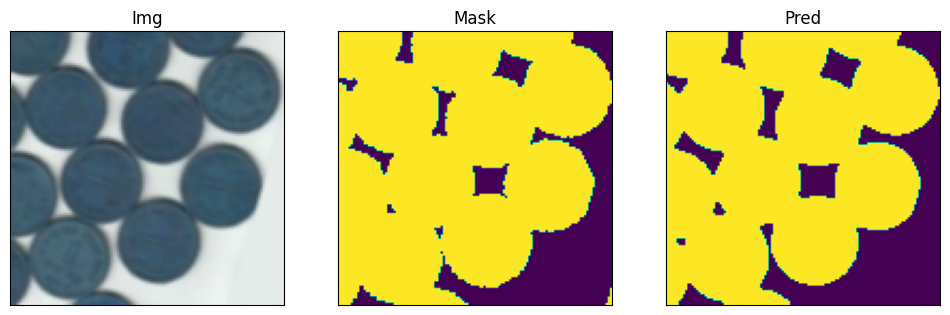

In [201]:
show_rand_c(unet2, x_test, y_test, predicted=u2p)